In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve


In [130]:
data = sns.load_dataset('titanic')


In [4]:
data.corr()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_12648\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [131]:
X = data.copy()
y = X.pop('survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)
print(X_train.shape)
X_test.shape


X_train[(X_train['pclass'] == 2) != (X_train['class'] == 'Second')]

(668, 14)


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [6]:
X_train.nunique()

cat_vars = ['sex', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
ord_vars = ['deck', 'alive']
num_vars = ['pclass', 'age', 'sibsp','parch', 'fare']


In [7]:
from sklearn.preprocessing import OneHotEncoder
X_train2= X_train[['pclass', 'sibsp','parch','sex', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']]
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform = "pandas")
enc.fit(X_train2)
enc.categories_
X_train3 = enc.transform(X_train2)

In [132]:
X_train = X_train[['fare', 'deck', 'adult_male', 'age']]
X_test = X_test[['fare', 'deck', 'adult_male', 'age']]



In [133]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X_train['deck'])

le.classes_

try2 = le.transform(X_train['deck'])
try2
X_train['deck'] = pd.DataFrame(np.where(try2 == 7, np.nan, try2))

try2 = le.transform(X_test['deck'])
try2
X_test['deck'] = pd.DataFrame(np.where(try2 == 7, np.nan, try2))


In [135]:
X_test

,fare,deck,adult_male,age
246,7.7750,NaN,False,25.0
588,8.0500,NaN,True,22.0
472,27.7500,NaN,False,33.0
71,46.9000,3.0,False,16.0
654,6.7500,NaN,False,18.0
...,...,...,...,...
827,37.0042,NaN,False,1.0
720,33.0000,NaN,False,6.0
14,7.8542,NaN,False,14.0
549,36.7500,NaN,False,8.0


In [136]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit(X_train.values)
X_train1 = imputer.transform(X_train.values)
X_test1 = imputer.transform(X_test.values)



array([[7.775000e+00, 1.400000e+00, 0.000000e+00, 2.500000e+01],
       [8.050000e+00, 1.600000e+00, 1.000000e+00, 2.200000e+01],
       [2.775000e+01, 2.600000e+00, 0.000000e+00, 3.300000e+01],
       [4.690000e+01, 3.000000e+00, 0.000000e+00, 1.600000e+01],
       [6.750000e+00, 1.800000e+00, 0.000000e+00, 1.800000e+01],
       [1.300000e+01, 1.600000e+00, 1.000000e+00, 3.000000e+01],
       [8.050000e+00, 1.800000e+00, 1.000000e+00, 1.600000e+01],
       [8.050000e+00, 1.800000e+00, 1.000000e+00, 1.900000e+01],
       [1.300000e+01, 1.800000e+00, 1.000000e+00, 2.300000e+01],
       [1.108833e+02, 2.600000e+00, 1.000000e+00, 1.700000e+01],
       [2.600000e+01, 2.600000e+00, 0.000000e+00, 2.000000e+00],
       [1.200000e+02, 2.600000e+00, 1.000000e+00, 3.600000e+01],
       [7.225000e+00, 2.400000e+00, 1.000000e+00, 2.380000e+01],
       [2.775000e+01, 2.600000e+00, 1.000000e+00, 3.600000e+01],
       [7.854200e+00, 1.000000e+00, 0.000000e+00, 3.100000e+01],
       [2.772080e+01, 4.0

In [243]:
df_imputed = pd.DataFrame(imputed, columns = X_train1.columns)

In [244]:
round(df_imputed, 0)

X_train8 = df_imputed[['fare', 'deck', 'pclass', 'age']]

In [119]:
X_train1

array([[ 0.87504426, -0.07492238, -0.44011087, ..., -0.05530017,
        -0.83072681,  1.11241272],
       [ 0.68322452,  1.77925821, -1.2558269 , ..., -0.00572745,
         0.62128827, -0.66133682],
       [ 0.26926589, -2.15623216, -0.18500212, ...,  0.24067539,
         1.02651351,  1.14127125],
       ...,
       [ 0.19410805,  0.29714296,  0.15308088, ..., -2.33408732,
         1.32710913, -0.58628564],
       [-0.38434543,  0.44079525,  1.10091111, ...,  0.04297165,
         1.50510702, -1.40027549],
       [ 0.79586468,  1.16184738,  0.71978085, ..., -1.28007892,
         1.05350373, -1.13716495]])

In [106]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
#from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay,
                             confusion_matrix, SCORERS)

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=42)
tree = clf.fit(X_train1, y_train)
RandomForestClassifier()
y_pred = clf.predict(X_test1)

In [169]:
X_train1

array([[ 26.    ,   2.8   ,   0.    ,  29.    ],
       [  7.3125,   2.4   ,   1.    ,  34.5   ],
       [164.8667,   1.8   ,   0.    ,  31.    ],
       ...,
       [ 21.075 ,   3.2   ,   0.    ,   2.    ],
       [ 10.5   ,   1.6   ,   1.    ,  30.    ],
       [  6.2375,   2.4   ,   1.    ,  61.    ]])

In [153]:
y_pred == y_test

246    False
588     True
472     True
71     False
654    False
       ...  
827     True
720     True
14     False
549     True
216     True
Name: survived, Length: 223, dtype: bool

In [118]:
X_train1.shape

(100, 20)

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

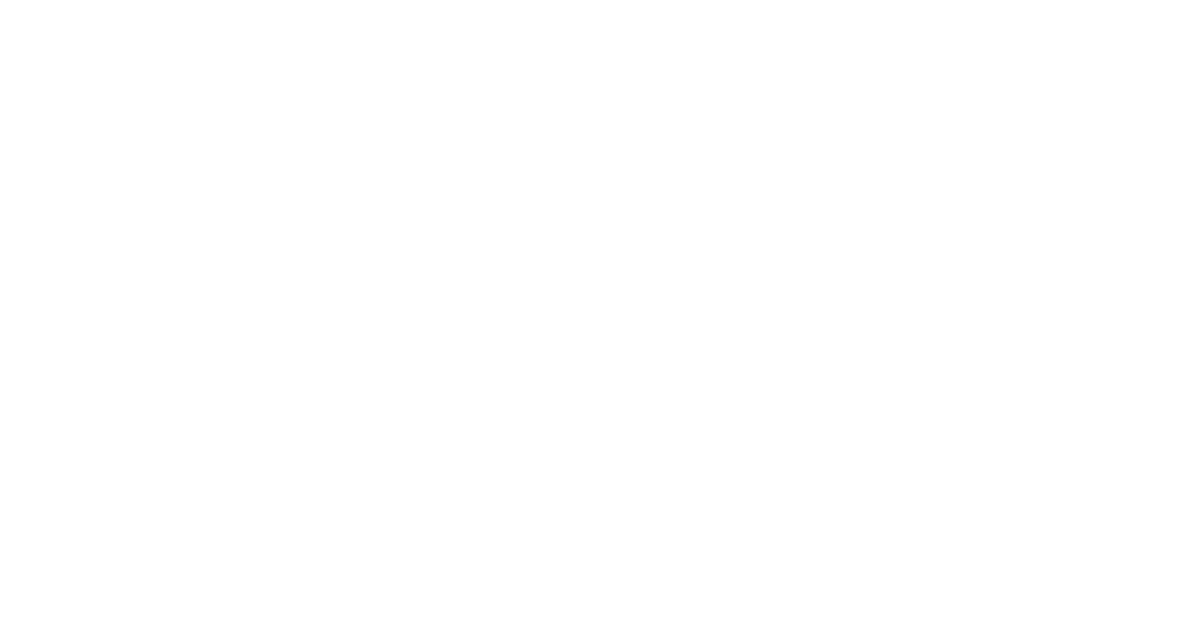

In [154]:
model = RandomForestClassifier(max_depth = 5) 
model.fit(X_train1, y_train)

plt.figure(figsize=(15, 8))

plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()


In [156]:
def give_f_imp(model,imputed):

    f_importance = pd.DataFrame({'feature_names': X_train.columns,
                                 'importance': model.feature_importances_})
    display(f_importance)

    plt.figure(figsize=(8, 5))
    plt.title('Feature importance')
    sns.barplot(data=f_importance, x='feature_names', y='importance')
    plt.xticks(rotation='vertical')
    plt.show()
    pass

,feature_names,importance
0,fare,0.288461
1,deck,0.065529
2,adult_male,0.519454
3,age,0.126556


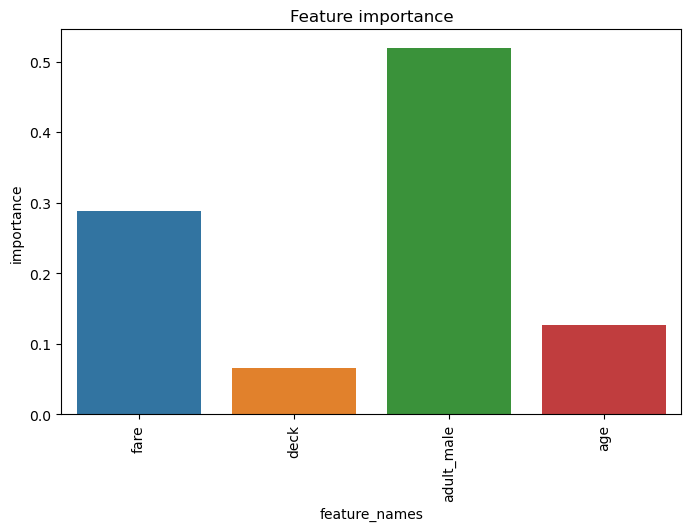

In [157]:
give_f_imp(model,imputed)

In [252]:

X_test1

,fare,deck,pclass,age
246,7.7750,NaN,3,25.0
588,8.0500,NaN,3,22.0
472,27.7500,NaN,2,33.0
71,46.9000,NaN,3,16.0
654,6.7500,NaN,3,18.0
...,...,...,...,...
827,37.0042,NaN,2,1.0
720,33.0000,NaN,2,6.0
14,7.8542,NaN,3,14.0
549,36.7500,NaN,2,8.0


In [159]:
y_pred = model.predict(X_test1)

score = accuracy_score(y_test,y_pred)
print(score)

0.7937219730941704


In [268]:
print(score)

0.726457399103139


In [160]:
def give_learning_curve(model,X_train,y_train, scoring= 'f1_macro'):
    n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring=scoring)

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'test score': val_score.mean(axis=1)})
    display(lc)
    # plot:
    
    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve')
    
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='test score', color='green')
    
    plt.xlabel('n rows')
    plt.ylabel(scoring)
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    pass


,n,train score,test score
0,53,1.000000,0.763528
1,106,0.950943,0.721412
2,160,0.933750,0.728953
3,213,0.898592,0.745438
4,267,0.885393,0.760420
5,320,0.870000,0.769420
6,373,0.867560,0.772439
7,427,0.859953,0.779912
8,480,0.846250,0.784401
9,534,0.836330,0.796375


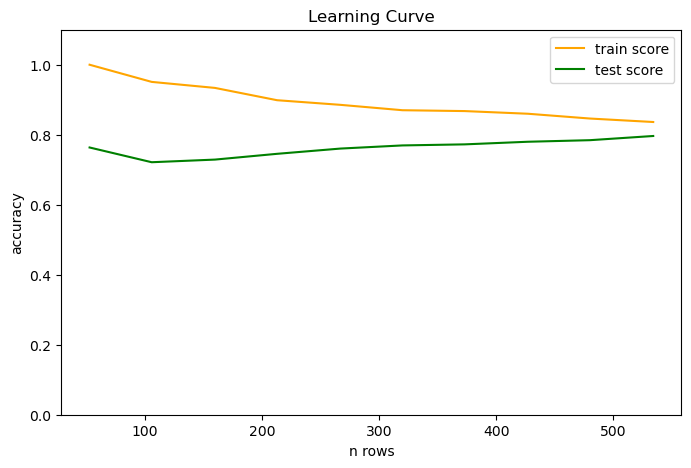

In [164]:
give_learning_curve(model, X_train1,y_train, scoring='accuracy')

In [166]:
def give_confusion_report(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_test)
    
    CM = ConfusionMatrixDisplay(confusion_matrix=cm)
    CM.plot()
    plt.show()
    
    print(classification_report(y_test,pred_test))
    pass 

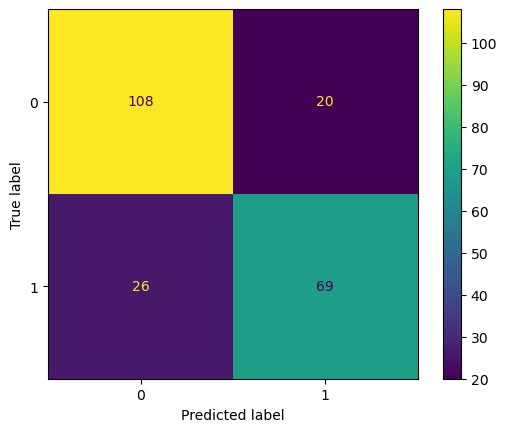

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       128
           1       0.78      0.73      0.75        95

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223



In [167]:
give_confusion_report(model,X_test1,y_test)

Decision Tree, max depth = 14

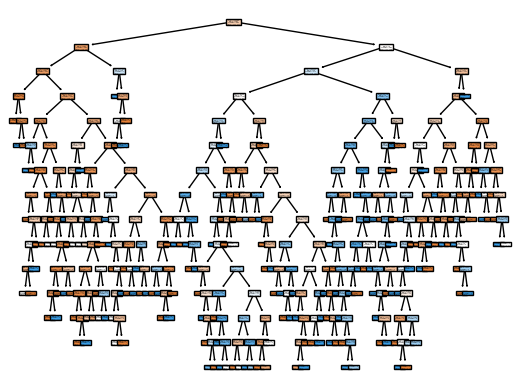

In [275]:
model_1 = DecisionTreeClassifier(max_depth = 14) 

model_1.fit(imputed,y_train)

#plt.figure(figsize=(15, 8))

plot_tree(model_1,
          feature_names=X_train8.columns,
          filled=True)
plt.show()


,feature_names,importance
0,fare,0.430598
1,deck,0.331144
2,pclass,0.006737
3,age,0.231522


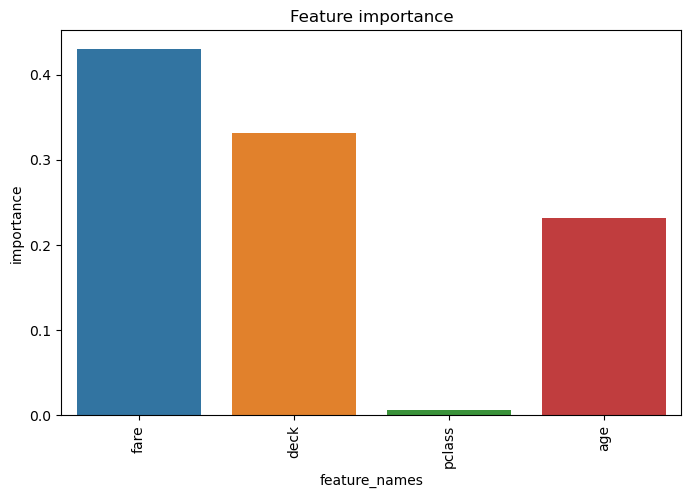

In [276]:
give_f_imp(model_1,imputed)

,n,train score,test score
0,53,0.984906,0.640624
1,106,0.986792,0.645191
2,160,0.983750,0.652688
3,213,0.971831,0.655684
4,267,0.967041,0.652699
5,320,0.963125,0.651251
6,373,0.961930,0.636292
7,427,0.953630,0.655662
8,480,0.955000,0.654147
9,534,0.949438,0.658647


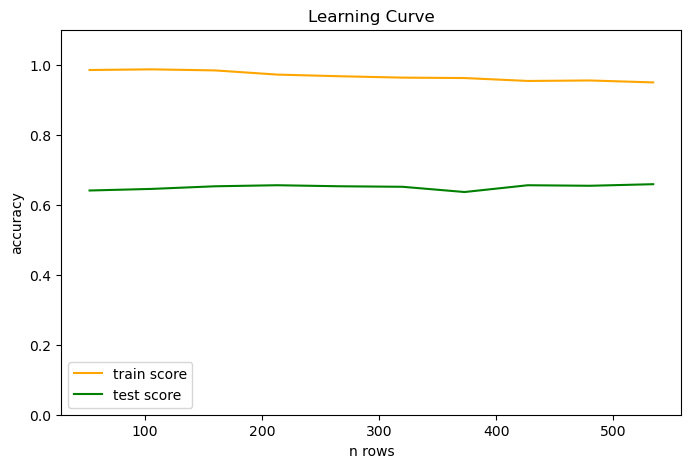

In [277]:
give_learning_curve(model_1, imputed,y_train, 'accuracy')

In [281]:
y_pred = model_1.predict(imputedtest)

score = accuracy_score(y_test,y_pred)
print(score)

0.6995515695067265


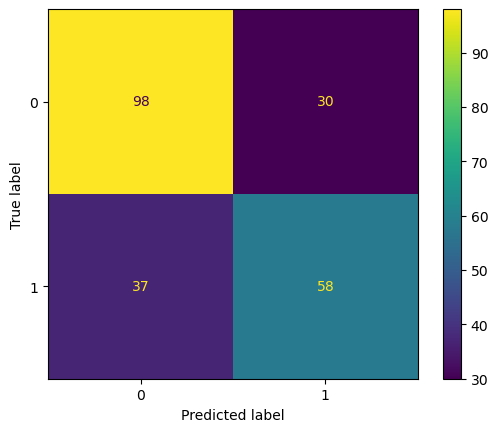

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       128
           1       0.66      0.61      0.63        95

    accuracy                           0.70       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.70      0.70      0.70       223



In [279]:
give_confusion_report(model_1,imputedtest,y_test)

**Linear Regression**

In [178]:
from sklearn.linear_model import LogisticRegression

In [201]:
clf = LogisticRegression(random_state=42).fit(X_train1, y_train)
y_pred = clf.predict(X_test1)

y_pred == y_test

246    False
588     True
472     True
71     False
654    False
       ...  
827     True
720     True
14     False
549     True
216     True
Name: survived, Length: 223, dtype: bool

,n,train score,test score
0,53,0.879245,0.749994
1,106,0.854717,0.724543
2,160,0.827500,0.736483
3,213,0.791549,0.772427
4,267,0.797004,0.782898
5,320,0.796875,0.779912
6,373,0.787131,0.779924
7,427,0.784543,0.782909
8,480,0.785833,0.782909
9,534,0.783521,0.784401


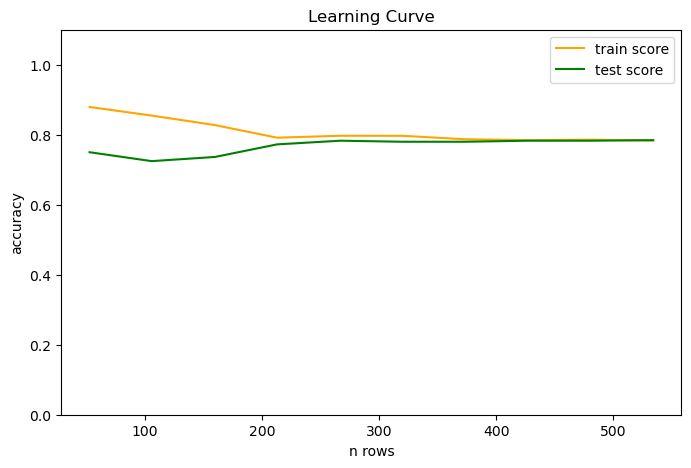

In [203]:
give_learning_curve(clf, X_train1,y_train, 'accuracy')

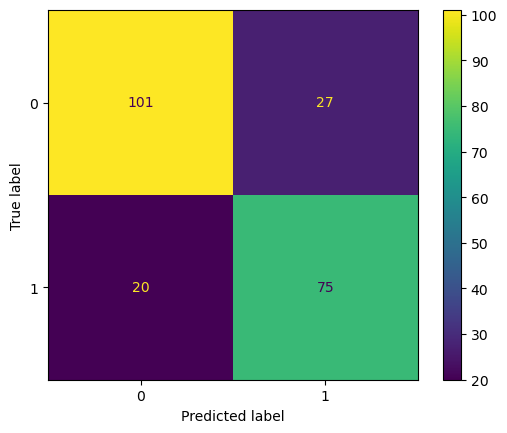

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       128
           1       0.74      0.79      0.76        95

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223



In [204]:
give_confusion_report(clf,X_test1,y_test)

In [205]:
accuracy_score(y_test,y_pred)

0.7892376681614349